1.Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

2.Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

3.Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4.Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5.Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
states_all =pd.read_csv("states_all.csv")
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


1.Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [3]:
states_all["overall_score"] = (states_all["GRADES_4_G"]*
                                (
                                    (states_all["AVG_MATH_4_SCORE"] +
states_all["AVG_READING_4_SCORE"])/2
                                ) + 
                                states_all["GRADES_8_G"] * 
                                (
                                    (states_all["AVG_MATH_8_SCORE"] + states_all["AVG_READING_8_SCORE"])/2)
                               )/(states_all["GRADES_4_G"] + states_all["GRADES_8_G"])

2.Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır? 

In [4]:
Korelasyon = states_all[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE","overall_score"]
           ].corr()

INSTRUCTION_EXPENDITURE ile en yuksek korelasyon goruyoruz. Diger harcamalarla ise dusuk bir korelasyon gorulmektedir. 


Text(0.5, 1.0, 'Korelasyon Matrisi (USA Egitim Sistemi)')

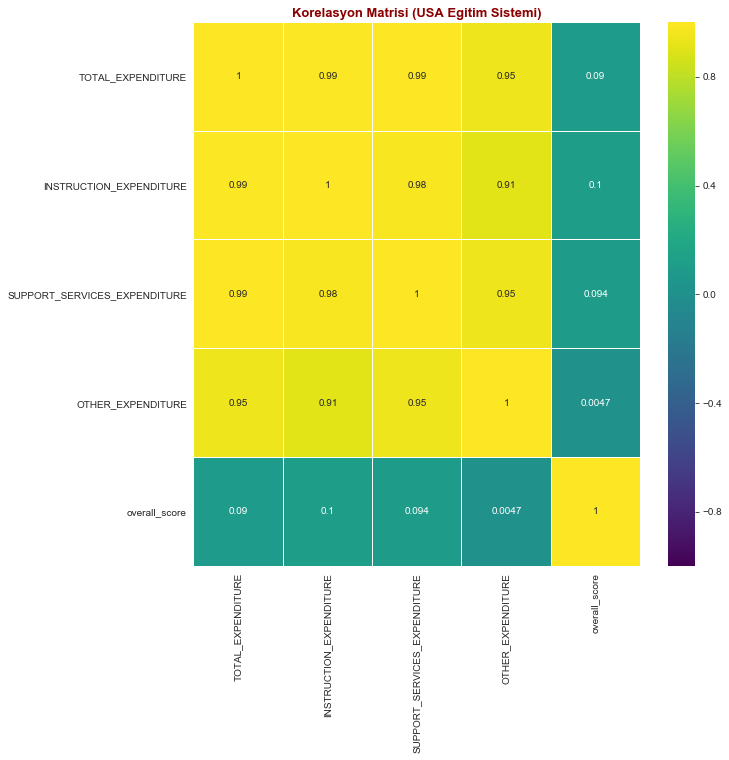

In [5]:
#Korelasyon Matrisi 
plt.figure(figsize=(10,10))
sns.heatmap(Korelasyon, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (USA Egitim Sistemi)", fontdict = baslik_font)


3.Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?


In [9]:
#Veri Setindeki NaN degerlerin doldurulmasi

states_all.fillna(states_all.mean(), inplace=True)

In [12]:
states_all4 = np.asarray(states_all[["TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                           "OTHER_EXPENDITURE"]])

In [31]:
states_all4s

array([[2653798., 1481703.,  735036.,      nan],
       [ 972488.,  498362.,  350902.,      nan],
       [3401580., 1435908., 1007732.,      nan],
       ...,
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan]])

In [15]:
df4 = states_all[['TOTAL_EXPENDITURE',
          'INSTRUCTION_EXPENDITURE', 
          'SUPPORT_SERVICES_EXPENDITURE', 
          'OTHER_EXPENDITURE'
        ]]

In [16]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pc = pca.fit_transform(df4)
print (pca.explained_variance_ratio_)

[0.9961128  0.00333654]


Temel Bileşen Analizinde, birinci temel bileşen, varyansı en çok açıklayan en büyük özdeğere karşılık gelen özvektördür. 2 bileşenli temel bileşen analizi yapıldığında ilk bileşenin, varyansın 99,6%'sını açıkladığını görüyoruz.

4.Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [20]:
states_all_pca = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
states_all_pca['overall_score'] = states_all['overall_score']

states_all_pca.head()

,PC1,PC2,overall_score
0,-7.566738e+06,124857.552160,249.597512
1,-9.546462e+06,-7724.842501,249.597512
2,-6.878981e+06,-264299.816089,235.639070
3,-8.642678e+06,83410.028991,235.441283
4,2.113943e+07,-42020.514530,249.597512


In [21]:
corr_matrix_2 = states_all_pca[['PC1','overall_score']].corr()

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_2, cmap='viridis', annot=True)
plt.title('Korelasyon Matrisi')

5.Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?